In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [11]:

# Ruta a la carpeta que contiene los datasets de imágenes
data_folder = "C:/Users/USUARIO/Desktop/IA Proyecto/IAProyect/Data"

# Recorre las subcarpetas dentro de 'Data'
for subfolder in os.listdir(data_folder):
    subfolder_path = os.path.join(data_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
        print(f"Procesando carpeta: {subfolder}")
        
        # Recorre cada archivo dentro de la subcarpeta
        for file_name in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file_name)
            
            # Imprime el nombre de todos los archivos encontrados
            print(f"Encontrado archivo: {file_name}")
            
            if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                print(f"Cargando imagen: {file_name}")
                
                # Cargar la imagen
                img = Image.open(file_path)
                
                # Mostrar la imagen (opcional)
                #plt.imshow(img)
                #plt.show()
                


Procesando carpeta: (E.S)B-light (1)
Encontrado archivo: 080116-0053.bmp
Cargando imagen: 080116-0053.bmp
Encontrado archivo: 080116-0053.jpg
Cargando imagen: 080116-0053.jpg
Encontrado archivo: 080116-0053.xml
Encontrado archivo: 080116-0059.bmp
Cargando imagen: 080116-0059.bmp
Encontrado archivo: 080116-0059.jpg
Cargando imagen: 080116-0059.jpg
Encontrado archivo: 080116-0059.xml
Encontrado archivo: 080119-0038.bmp
Cargando imagen: 080119-0038.bmp
Encontrado archivo: 080119-0038.jpg
Cargando imagen: 080119-0038.jpg
Encontrado archivo: 080119-0038.xml
Encontrado archivo: DSC02587.bmp
Cargando imagen: DSC02587.bmp
Encontrado archivo: DSC02587.JPG
Encontrado archivo: DSC02587.xml
Encontrado archivo: DSC02712.bmp
Cargando imagen: DSC02712.bmp
Encontrado archivo: DSC02712.JPG
Encontrado archivo: DSC02712.xml
Encontrado archivo: DSC02980.bmp
Cargando imagen: DSC02980.bmp
Encontrado archivo: DSC02980.JPG
Encontrado archivo: DSC02980.xml
Encontrado archivo: DSC03007.bmp
Cargando imagen: DSC0

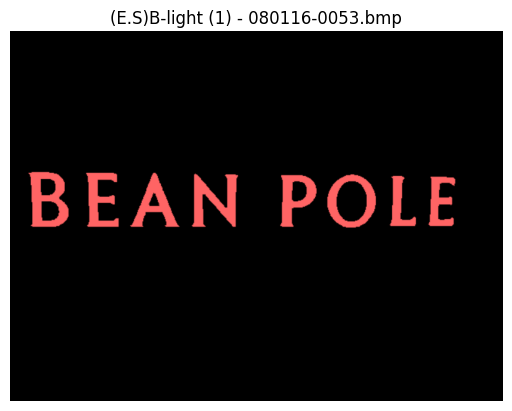

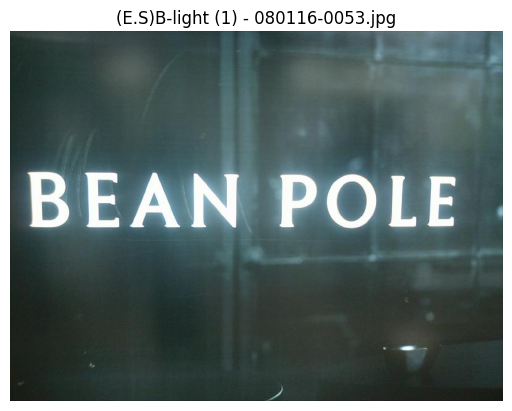

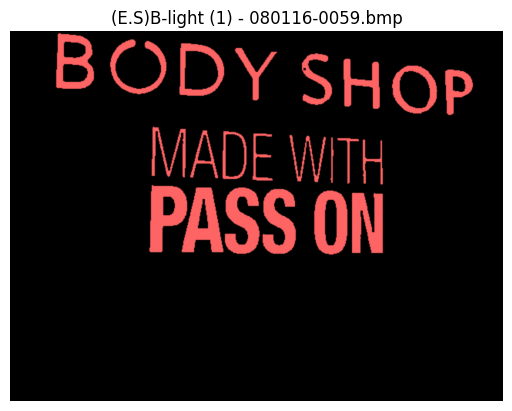

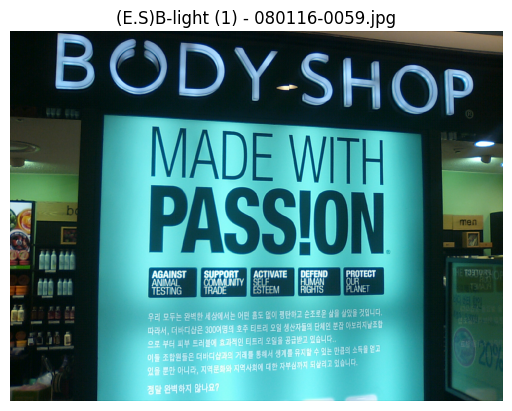

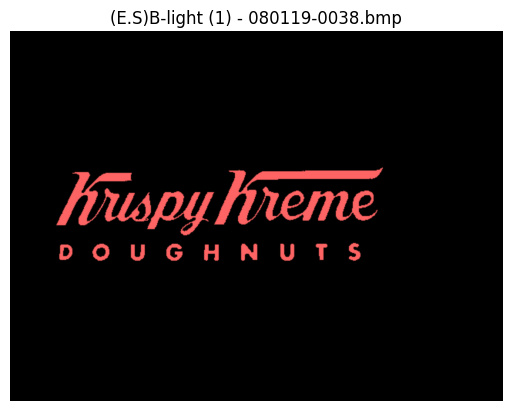

In [12]:

# Definimos una función para cargar y mostrar imágenes
def load_and_preview_images(data_folder, num_images=5):
    image_count = 0
    for subfolder in os.listdir(data_folder):
        subfolder_path = os.path.join(data_folder, subfolder)
        
        if os.path.isdir(subfolder_path):
            for file_name in os.listdir(subfolder_path):
                if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = Image.open(file_path)
                    
                    # Mostrar la imagen
                    plt.imshow(img)
                    plt.title(f"{subfolder} - {file_name}")
                    plt.axis('off')
                    plt.show()
                    
                    image_count += 1
                    if image_count >= num_images:
                        return

# Previsualizar 5 imágenes
load_and_preview_images(data_folder, num_images=5)


In [13]:
def count_images_by_folder(data_folder):
    folder_counts = {}

    # Recorrer las subcarpetas de manera recursiva
    for root, dirs, files in os.walk(data_folder):
        image_count = len([f for f in files if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
        # Tomar el nombre de la subcarpeta desde el camino completo (root)
        subfolder = os.path.relpath(root, data_folder)
        if image_count > 0:
            folder_counts[subfolder] = image_count
    
    return folder_counts



# Contar las imágenes en cada subcarpeta
image_counts = count_images_by_folder(data_folder)
print("Recuento de imágenes por carpeta:", image_counts)

Recuento de imágenes por carpeta: {'(E.S)B-light (1)': 19, '(E.S)D-indoor': 76, 'svt\\svt1\\img': 350, 'svt\\__MACOSX\\svt1\\img': 350}


Recuento de imágenes por carpeta: {'(E.S)B-light (1)': 19, '(E.S)D-indoor': 76, 'svt\\svt1\\img': 350, 'svt\\__MACOSX\\svt1\\img': 350}
Tipos de archivos por carpeta: {'(E.S)B-light (1)': '.bmp, .jpg', '(E.S)D-indoor': '.bmp, .jpg', 'svt\\svt1\\img': '.jpg', 'svt\\__MACOSX\\svt1\\img': '.jpg'}


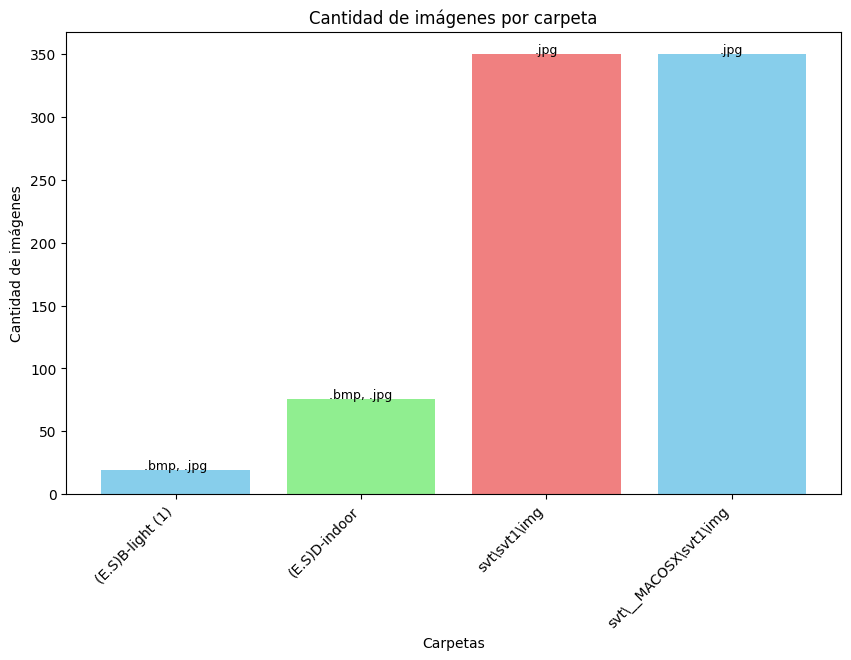

In [21]:

def count_images_by_folder(data_folder):
    folder_counts = {}
    folder_file_types = {}

    # Recorrer las subcarpetas de manera recursiva
    for root, dirs, files in os.walk(data_folder):
        images = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        image_count = len(images)
        
        # Contar tipos de archivos
        file_types = set(os.path.splitext(f)[1] for f in images)
        
        if image_count > 0:
            # Obtener la ruta relativa de la subcarpeta respecto a la carpeta principal
            subfolder = os.path.relpath(root, data_folder)
            folder_counts[subfolder] = image_count
            folder_file_types[subfolder] = ", ".join(file_types)
    
    return folder_counts, folder_file_types


# Contar las imágenes en cada subcarpeta y obtener los tipos de archivos
image_counts, folder_file_types = count_images_by_folder(data_folder)

# Imprimir los resultados
print("Recuento de imágenes por carpeta:", image_counts)
print("Tipos de archivos por carpeta:", folder_file_types)

# Crear el gráfico de barras
folders = list(image_counts.keys())
counts = list(image_counts.values())

colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(10, 6))
plt.bar(folders, counts, color=colors)
plt.xlabel('Carpetas')
plt.ylabel('Cantidad de imágenes')
plt.title('Cantidad de imágenes por carpeta')
plt.xticks(rotation=45, ha="right")

# Añadir etiquetas con tipos de archivos
for i, folder in enumerate(folders):
    plt.text(i, counts[i] + 0.5, folder_file_types[folder], ha='center', fontsize=9)

plt.show()


Formatos de imagen: {'JPEG', 'BMP'}
Tamaños de imagen (ancho, alto): {(640, 480), (385, 212), (800, 600), (320, 240), (1600, 1200)}


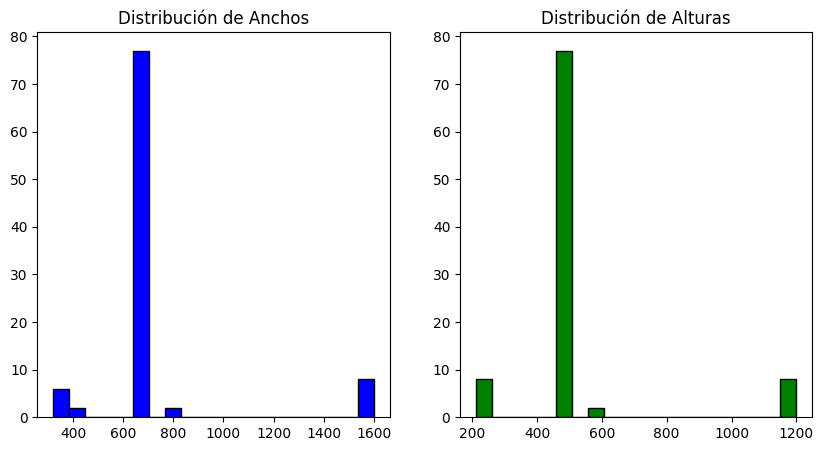

In [11]:
def image_statistics(data_folder):
    formats = []
    sizes = []
    
    for subfolder in os.listdir(data_folder):
        subfolder_path = os.path.join(data_folder, subfolder)
        
        if os.path.isdir(subfolder_path):
            for file_name in os.listdir(subfolder_path):
                if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = Image.open(file_path)
                    
                    # Añadir formato y tamaño
                    formats.append(img.format)
                    sizes.append(img.size)
    
    return formats, sizes

# Obtener las estadísticas
formats, sizes = image_statistics(data_folder)

# Mostrar resultados
print("Formatos de imagen:", set(formats))
print("Tamaños de imagen (ancho, alto):", set(sizes))

# Histograma de tamaños
widths, heights = zip(*sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', edgecolor='black')
plt.title('Distribución de Anchos')
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', edgecolor='black')
plt.title('Distribución de Alturas')
plt.show()


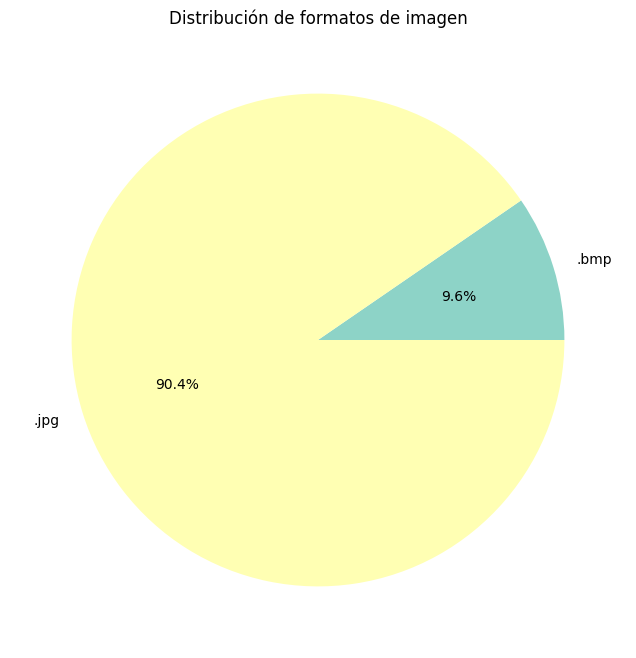

In [17]:
import os
import matplotlib.pyplot as plt

def image_format_distribution(data_folder):
    format_counts = {}
    
    # Recorrer las subcarpetas de manera recursiva
    for root, dirs, files in os.walk(data_folder):
        for file_name in files:
            file_extension = os.path.splitext(file_name)[1].lower()
            if file_extension in ['.png', '.jpg', '.jpeg', '.bmp']:
                format_counts[file_extension] = format_counts.get(file_extension, 0) + 1
    
    return format_counts

# Obtener la distribución de formatos de imagen
format_counts = image_format_distribution(data_folder)

# Crear gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(format_counts.values(), labels=format_counts.keys(), autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribución de formatos de imagen')
plt.show()



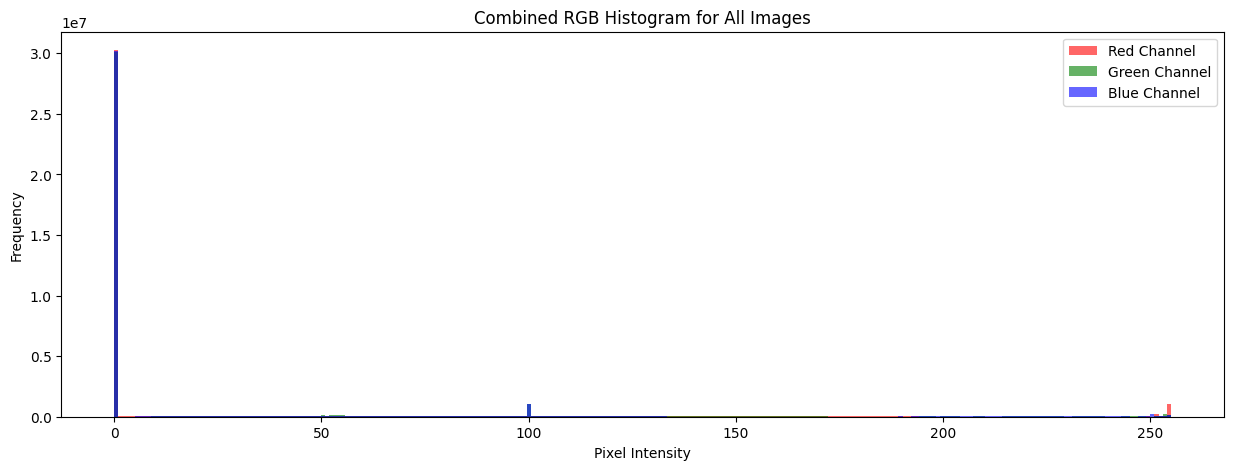

In [19]:


# Función para acumular los valores de los canales de color RGB
def accumulate_rgb_values(data_folder):
    r_values = []
    g_values = []
    b_values = []
    
    for subfolder in os.listdir(data_folder):
        subfolder_path = os.path.join(data_folder, subfolder)
        
        if os.path.isdir(subfolder_path):
            for file_name in os.listdir(subfolder_path):
                if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = Image.open(file_path)
                    img_array = np.array(img)
                    
                    # Acumular los valores de los canales R, G, B
                    r_values.extend(img_array[..., 0].ravel())
                    g_values.extend(img_array[..., 1].ravel())
                    b_values.extend(img_array[..., 2].ravel())
    
    return r_values, g_values, b_values

# Acumular valores de color RGB
r_values, g_values, b_values = accumulate_rgb_values(data_folder)

# Graficar histogramas combinados de RGB
plt.figure(figsize=(15, 5))
plt.hist(r_values, bins=256, color='red', alpha=0.6, label='Red Channel')
plt.hist(g_values, bins=256, color='green', alpha=0.6, label='Green Channel')
plt.hist(b_values, bins=256, color='blue', alpha=0.6, label='Blue Channel')
plt.title('Combined RGB Histogram for All Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()
